https://www.drivendata.org/competitions/2/warm-up-predict-blood-donations/data/

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import itertools
import seaborn as sns
from sklearn import metrics
import sklearn
%matplotlib inline

In [27]:
!ls

5c9fa979-5a84-45d6-93b9-543d1a0efc41.csv  Predict Blood Donations.ipynb
9db113a1-cdbe-4b1c-98c2-11590f124dd8.csv  simple_xgb.csv
BloodDonationSubmissionFormat.csv	  tensorflow_logistics.csv


In [28]:
train_data_df = pd.read_csv('9db113a1-cdbe-4b1c-98c2-11590f124dd8.csv')
print('Number of train samples: ' , len(train_data_df))
train_data_df.head()

Number of train samples:  576


,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [29]:
train_data_df.columns

Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

Lets see how the outpus are distributed


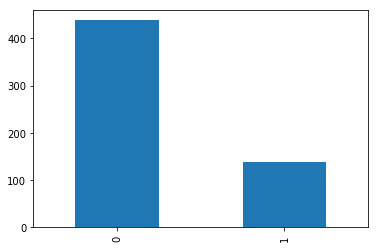

In [30]:
print('Lets see how the outpus are distributed')
train_data_df['Made Donation in March 2007'].value_counts().plot.bar()

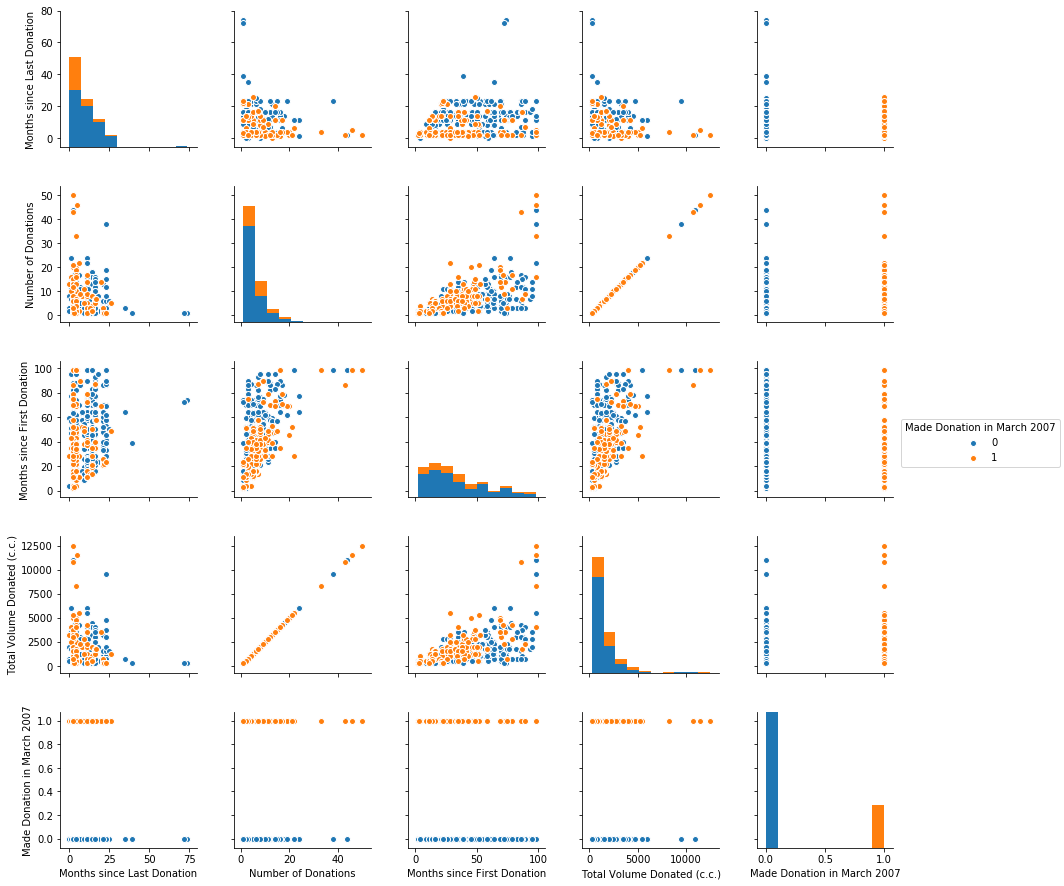

In [31]:
sns.pairplot(train_data_df[['Months since Last Donation', 'Number of Donations',
        'Months since First Donation', 'Total Volume Donated (c.c.)', 'Made Donation in March 2007']], hue='Made Donation in March 2007')

In [32]:
test_data_df = pd.read_csv('5c9fa979-5a84-45d6-93b9-543d1a0efc41.csv')
print('Number of test samples: ' , len(test_data_df))
test_data_df.head()

Number of test samples:  200


,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,659,2,12,3000,52
1,276,21,7,1750,38
2,263,4,1,250,4
3,303,11,11,2750,38
4,83,4,12,3000,34


In [33]:
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
Unnamed: 0                     576 non-null int64
Months since Last Donation     576 non-null int64
Number of Donations            576 non-null int64
Total Volume Donated (c.c.)    576 non-null int64
Months since First Donation    576 non-null int64
Made Donation in March 2007    576 non-null int64
dtypes: int64(6)
memory usage: 27.1 KB


In [34]:
#  log("Months since First Donation"-"Months since Last Donation"),


In [35]:
def feature_engineering(df):
    new_df  = df.copy()
    cols = df.columns.tolist()
    
    new_df['feature1'] = np.log(new_df["Months since First Donation"] - new_df["Months since Last Donation"] + 0.001)
    
    return new_df.fillna(0)


In [36]:
train_data_featured = feature_engineering(train_data_df[['Months since Last Donation', 'Number of Donations',
        'Months since First Donation']])
test_data_featured = feature_engineering(test_data_df[['Months since Last Donation', 'Number of Donations',
        'Months since First Donation']])
train_data_featured

,Months since Last Donation,Number of Donations,Months since First Donation,feature1
0,2,50,98,4.564359
1,0,13,28,3.332240
2,1,16,35,3.526390
3,2,20,45,3.761223
4,1,24,77,4.330746
5,4,4,4,-6.907755
6,2,7,14,2.484990
7,1,12,35,3.526390
8,5,46,98,4.532610
9,0,3,4,1.386544


In [37]:
train_data_featured.columns

Index(['Months since Last Donation', 'Number of Donations',
       'Months since First Donation', 'feature1'],
      dtype='object')

In [38]:
# Pull out target variable
y_vals = train_data_df['Made Donation in March 2007'].values
#Pull out features
x_vals = np.array([x[0:] for x in train_data_featured.values.tolist()])

print('Number of features: ', x_vals.shape[0])
print('Number of feature arrtributes: ', x_vals.shape[1])
# x_vals

Number of features:  576
Number of feature arrtributes:  4


In [39]:
test_data_vals = test_data_featured.values.tolist()
x_vals_test = np.array([x[0:] for x in test_data_vals])

# x_vals_test[:10]

In [40]:
# Split data into train/test = 80%/20%
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.7), replace=False)
validation_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_validation = x_vals[validation_indices]
y_vals_train = y_vals[train_indices]
y_vals_validation = y_vals[validation_indices]

$Log loss = - \frac{1}{n} \sum_{i=1}^n \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right]$


# XGBoost

-https://www.slideshare.net/ShangxuanZhang/kaggle-winning-solution-xgboost-algorithm-let-us-learn-from-its-author 
- https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
- http://xgboost.readthedocs.io/en/latest/parameter.html
- https://github.com/dmlc/xgboost/tree/master/demo/guide-python
- http://xgboost.readthedocs.io/en/latest/python/python_api.html

Reference: https://www.kaggle.com/wangyijia/xgboost-tfidf-logloss-0-3/code   
https://jessesw.com/XG-Boost/

In [83]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from numpy import loadtxt
from xgboost import XGBClassifier
import xgboost as xgb

In [42]:
# Set our parameters for xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.01
params['max_depth'] = 7

## With XG-CV

In [49]:
d_train = xgb.DMatrix(x_vals_train, label=y_vals_train)

bst = xgb.cv(params=params, dtrain=d_train, num_boost_round=1000,
             early_stopping_rounds=50, verbose_eval=10, nfold=5, seed=42)


[0]	train-logloss:0.689085+0.000214464	test-logloss:0.690076+0.000291923
[10]	train-logloss:0.652563+0.00196532	test-logloss:0.662598+0.00286333
[20]	train-logloss:0.621586+0.00367553	test-logloss:0.640357+0.00529023
[30]	train-logloss:0.595094+0.00526943	test-logloss:0.621963+0.00749158
[40]	train-logloss:0.572174+0.00694709	test-logloss:0.607041+0.00933151
[50]	train-logloss:0.551632+0.00827167	test-logloss:0.594516+0.0121229
[60]	train-logloss:0.53295+0.00966136	test-logloss:0.584933+0.0150128
[70]	train-logloss:0.516422+0.0109158	test-logloss:0.577198+0.0174692
[80]	train-logloss:0.501821+0.0119193	test-logloss:0.570967+0.0200238
[90]	train-logloss:0.488648+0.0127702	test-logloss:0.566388+0.0223163
[100]	train-logloss:0.476763+0.0134676	test-logloss:0.563227+0.0245878
[110]	train-logloss:0.465984+0.0140237	test-logloss:0.560885+0.026786
[120]	train-logloss:0.456346+0.0145762	test-logloss:0.559448+0.0291181
[130]	train-logloss:0.447554+0.0150892	test-logloss:0.558754+0.0316628
[140]

# Grid Search


We will use an approach similar to that of GBM here. The various steps to be performed are:

- Choose a relatively high learning rate. Generally a learning rate of 0.1 works but somewhere between 0.05 to 0.3 should work for different problems. Determine the optimum number of trees for this learning rate. XGBoost has a very useful function called as “cv” which performs cross-validation at each boosting iteration and thus returns the optimum number of trees required.
- Tune tree-specific parameters ( max_depth, min_child_weight, gamma, subsample, colsample_bytree) for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.
- Tune regularization parameters (lambda, alpha) for xgboost which can help reduce model complexity and enhance performance.
- Lower the learning rate and decide the optimal parameters .


In [52]:
clf = xgb.XGBClassifier(**ind_params)
eval_set  = [(x_vals_train,y_vals_train), (x_vals_validation,y_vals_validation)]
clf.fit(x_vals_train, y_vals_train, eval_set=eval_set, 
        eval_metric="logloss", early_stopping_rounds=30)

[0]	validation_0-logloss:0.661621	validation_1-logloss:0.654535
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 30 rounds.
[1]	validation_0-logloss:0.633485	validation_1-logloss:0.621866
[2]	validation_0-logloss:0.610823	validation_1-logloss:0.594753
[3]	validation_0-logloss:0.589651	validation_1-logloss:0.57118
[4]	validation_0-logloss:0.574667	validation_1-logloss:0.554059
[5]	validation_0-logloss:0.560315	validation_1-logloss:0.536473
[6]	validation_0-logloss:0.549328	validation_1-logloss:0.52144
[7]	validation_0-logloss:0.538345	validation_1-logloss:0.509673
[8]	validation_0-logloss:0.528511	validation_1-logloss:0.495835
[9]	validation_0-logloss:0.519544	validation_1-logloss:0.48476
[10]	validation_0-logloss:0.511304	validation_1-logloss:0.476717
[11]	validation_0-logloss:0.505667	validation_1-logloss:0.470032
[12]	validation_0-logloss:0.50116	validation_1-logloss:0.462942
[13]

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

In [93]:
 XGBClassifier?

In [105]:
gbm_params = {
    'max_depth': [2, 3, 6],
    'n_estimators': [300, 700, 1000]
#     'gamma':, 
#     'min_child_weight':, 
#     'max_delta_step':,
#     'subsample': [0.2, 0.5,0.8], 
#     'colsample_bytree': [0.2, 0.5,0.8], 
#     'colsample_bylevel': [0.2, 0.5,0.8], 
#     'reg_alpha': [0.001, 0.01, 0.1], 
#     'reg_lambda': [0.001, 0.01, 0.1]
#     'scale_pos_weight':
}
ind_params = {'learning_rate': 0.1, 'silent':False, 'missing':0,
             'objective': 'binary:logistic'}

estimator=XGBClassifier(**ind_params)

optimized_GBM = GridSearchCV(estimator=estimator, 
                            param_grid=gbm_params, 
                             scoring = 'log_loss', cv=2, n_jobs = -1, verbose=99) 

In [ ]:
optimized_GBM.fit(x_vals_train, y_vals_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] max_depth=2, n_estimators=300 ...................................
[CV] max_depth=2, n_estimators=300 ...................................
[CV] max_depth=2, n_estimators=700 ...................................
[CV] max_depth=2, n_estimators=700 ...................................
Pickling array (shape=(403, 4), dtype=float64).
Pickling array (shape=(403,), dtype=int64).
Pickling array (shape=(201,), dtype=int64).
Pickling array (shape=(202,), dtype=int64).
Pickling array (shape=(403, 4), dtype=float64).
Pickling array (shape=(403,), dtype=int64).
Pickling array (shape=(202,), dtype=int64).
Pickling array (shape=(201,), dtype=int64).
Pickling array (shape=(403, 4), dtype=float64).
Pickling array (shape=(403,), dtype=int64).
Pickling array (shape=(201,), dtype=int64).
Pickling array (shape=(202,), dtype=int64).
Pickling array (shape=(403, 4), dtype=float64).
Pickling array (shape=(403,), dtype=int64).
Pickling array (shape=(2

In [ ]:
optimized_GBM.grid_scores_

# Final Train and Submission Process

[0]	train-logloss:0.688364	valid-logloss:0.68949
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.645491	valid-logloss:0.657557
[20]	train-logloss:0.609162	valid-logloss:0.631578
[30]	train-logloss:0.578249	valid-logloss:0.610464
[40]	train-logloss:0.551828	valid-logloss:0.593636
[50]	train-logloss:0.528015	valid-logloss:0.580819
[60]	train-logloss:0.507008	valid-logloss:0.570122
[70]	train-logloss:0.488155	valid-logloss:0.561873
[80]	train-logloss:0.471339	valid-logloss:0.555369
[90]	train-logloss:0.456177	valid-logloss:0.55043
[100]	train-logloss:0.442758	valid-logloss:0.546943
[110]	train-logloss:0.430775	valid-logloss:0.544752
[120]	train-logloss:0.41997	valid-logloss:0.54312
[130]	train-logloss:0.410043	valid-logloss:0.542445
[140]	train-logloss:0.400697	valid-logloss:0.542499
[150]	train-logloss:0.392273	valid-logloss:0.542354
[160]	train-logloss:0.384479	val

array([ 0.66648418,  0.25972432,  0.19929522,  0.20786755,  0.4631409 ,
        0.5269751 ,  0.27614427,  0.14695796,  0.11362632,  0.12356345], dtype=float32)

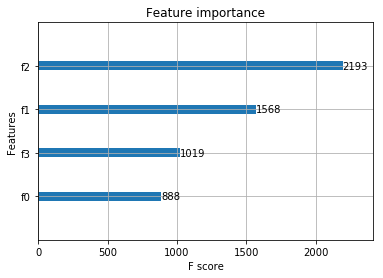

In [43]:

d_train = xgb.DMatrix(x_vals_train, label=y_vals_train)
d_valid = xgb.DMatrix(x_vals_validation, label=y_vals_validation)


watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, verbose_eval=10)

xgb.plot_importance(bst)

#Create submission file
d_test = xgb.DMatrix(x_vals_test)
p_test = bst.predict(d_test)
p_test[:10]

In [ ]:
# summarize the fit of the model
print(metrics.classification_report(y_vals_validation.astype(float), p_test.astype(float)))
print('----------------------------------------------------------\n')
print(metrics.confusion_matrix(y_vals_validation.astype(float), p_test.astype(float)))

In [ ]:
sub = pd.DataFrame()
sub['Unnamed: 0'] = test_data_df['Unnamed: 0']
sub['Made Donation in March 2007'] = p_test

print(sub.head())
sub.to_csv('simple_xgb.csv', index=False) #0.4704

In [ ]:
y_vals_validation.astype(float), p_test

# Function to generate submission

In [ ]:

def generate_submission(predictions, file_name):
    df = pd.DataFrame(predictions.astype(np.float64),
            index=test_data_df['Unnamed: 0'],
            columns=['Made Donation in March 2007'])
    df.to_csv(file_name)
    return df
    

# Log Loss

# Cross Entropy

$H = - \sum_i(p_ilog_2(q_i))$

Example:
For instance, let’s calculate the entropy for the word “HELLO.”

Lets calculate $p_i$

$p("H") = p("E") = p("O") = 1/5 = 0.2$

$p("L") = 2/5 = 0.4$

Lets calculate $q_i$

For example, ASCII assigns the uniform probability $q_i = 1/256$ for all its symbols. Let’s
calculate the cross-entropy for the word “HELLO” in ASCII encoding

$p("H") = p("E") = p("O") = p("L") = 1/256$


$H = -3 * 0.2 * log_2(1/256) - 0.4 * log_2(1/256) = 8$

# Lets see how a Logistic Regression in Tensorflow works

$$f(x) = \frac{1}{1+e^{-x}}$$

In [ ]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def tan(x):
    return math.tanh(x)

def relu1(x):
    return max(0, min(1,x))

x = [i for i in np.arange(-1, 1, 0.001)]
sigmoid_y = [sigmoid(i) for i in x]
tan_y = [tan(i) for i in x]
relu1_y = [relu1(i) for i in x]
plt.plot(x,sigmoid_y)
plt.plot(x, tan_y)
plt.plot(x, relu1_y)
plt.grid(True)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.python.framework import ops

In [ ]:
# set for reproducible results
seed = 99
np.random.seed(seed)
tf.set_random_seed(seed)

# Normalize by column (min-max norm)
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min) / (col_max - col_min)
    
x_vals_train_norm = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_validation_norm = np.nan_to_num(normalize_cols(x_vals_validation))

In [ ]:
y_vals_train_expanded = np.array([[1,0] if y == 0 else [0,1] for y in y_vals_train ])
y_vals_validation_expanded  = np.array([[1,0] if y == 0 else [0,1] for y in y_vals_validation ])

## Define Tensorflow computational graph

In [ ]:
ops.reset_default_graph()

# Create graph
sess = tf.Session()

In [ ]:
# Declare batch size
batch_size = 25

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32, name = 'x_data')
y_target = tf.placeholder(shape=[None, 2], dtype=tf.float32, name='y_target')

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[3,1]))
b = tf.Variable(tf.random_normal(shape=[2]))

# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

print(model_output)

y_pred = tf.nn.softmax(model_output)

# Declare loss function (Cross Entropy loss)
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model_output, labels=y_target))

# loss = tf.losses.log_loss(y_target, y_pred)

# loss = - tf.reduce_mean(
#             tf.add(
#                 tf.multiply(tf.cast(y_target, "float"), tf.log(y_pred)),
#                 tf.multiply(tf.subtract(1.0,y_target),tf.log(tf.subtract(1.0, y_pred))))
#          )

# loss = tf.reduce_mean(
#     -tf.reduce_sum(tf.cast(y_target, "float") *
#                    tf.log(y_pred),
#                    axis=1))

# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

## Train model

In [ ]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

# Actual Prediction
prediction = tf.round(tf.sigmoid(model_output))
predictions_correct = tf.cast(tf.equal(prediction, y_target), tf.float32)
accuracy = tf.reduce_mean(predictions_correct)

# Training loop
loss_vec = []
train_acc = []
test_acc = []
for i in range(2000):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train_norm[rand_index]
    rand_y = y_vals_train_expanded[rand_index]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    temp_acc_train = sess.run(accuracy, feed_dict={x_data: x_vals_train_norm, y_target: 
                                                   y_vals_train_expanded})
    train_acc.append(temp_acc_train)
    temp_acc_test = sess.run(accuracy, feed_dict={x_data: x_vals_validation_norm, y_target: 
                                                  y_vals_validation_expanded})
    test_acc.append(temp_acc_test)
    if (i+1)%300==0:
        print('Loss = ' + str(temp_loss))
        

In [ ]:
%matplotlib inline
# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Cross Entropy Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Cross Entropy Loss')
plt.show()

# Plot train and test accuracy
plt.plot(train_acc, 'k-', label='Train Set Accuracy')
plt.plot(test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
tensor_flow_predictions = sess.run(y_pred, feed_dict={x_data: x_vals_test})
tensor_flow_predictions

In [ ]:
df = generate_submission(tensor_flow_predictions, 'tensorflow_logistics.csv')
df

# Scikit

## Logistic Regression

In [ ]:
# Logistic Regression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
# load the iris datasets
# fit a logistic regression model to the data
model = LogisticRegression()
model.fit(x_vals_train, y_vals_train)
print(model)
print('----------------------------------------------------------\n')
# make predictions
expected = y_vals_validation
predicted = model.predict(x_vals_validation)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print('----------------------------------------------------------\n')
print(metrics.confusion_matrix(expected, predicted))


# Gaussian Naive Bayes

In [ ]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
# fit a Naive Bayes model to the data
model = GaussianNB()
model.fit(x_vals_train, y_vals_train)
print(model)
print('----------------------------------------------------------\n')
# make predictions
expected = y_vals_validation
predicted = model.predict(x_vals_validation)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print('----------------------------------------------------------\n')
print(metrics.confusion_matrix(expected, predicted))

# k-Nearest Neighbor

In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
# fit a k-nearest neighbor model to the data
model = KNeighborsClassifier()
model.fit(x_vals_train, y_vals_train)
print(model)
print('----------------------------------------------------------\n')
# make predictions
expected = y_vals_validation
predicted = model.predict(x_vals_validation)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print('----------------------------------------------------------\n')
print(metrics.confusion_matrix(expected, predicted))

# Decision Tree Classifier

In [ ]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
# fit a CART model to the data
model = DecisionTreeClassifier()
model.fit(x_vals_train, y_vals_train)
print(model)
print('----------------------------------------------------------\n')
# make predictions
expected = y_vals_validation
predicted = model.predict(x_vals_validation)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print('----------------------------------------------------------\n')
print(metrics.confusion_matrix(expected, predicted))

## SVM

In [ ]:
predicted

In [ ]:
# Support Vector Machine
from sklearn import metrics
from sklearn.svm import SVC
# fit a SVM model to the data
model = SVC(probability=True)
model.fit(x_vals_train, y_vals_train)
print(model)
print('----------------------------------------------------------\n')
# make predictions
expected = y_vals_validation
predicted = model.predict(x_vals_validation)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print('----------------------------------------------------------\n')
print(metrics.confusion_matrix(expected, predicted))